SimpleRNN

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
137/137 [==============================] - 10s 67ms/step - loss: 0.6684 - acc: 0.5830 - val_loss: 0.5986 - val_acc: 0.7207
Epoch 2/5
137/137 [==============================] - 9s 67ms/step - loss: 0.4599 - acc: 0.7963 - val_loss: 0.5098 - val_acc: 0.7465
Epoch 3/5
137/137 [============================

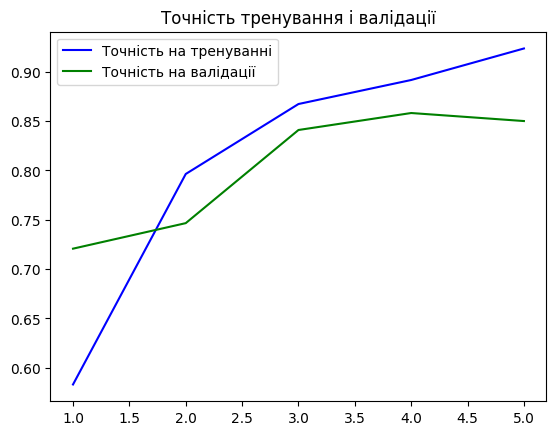

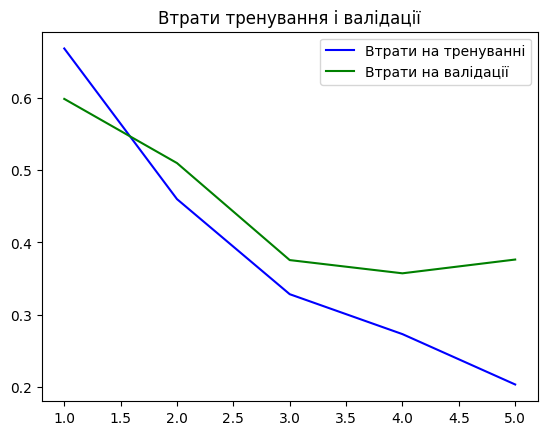

782/782 [==============================] - 11s 14ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 9s 11ms/step - loss: 0.3791 - acc: 0.8454
Test Loss: 0.37911415100097656
Test Accuracy: 0.8453599810600281


In [3]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional




max_features = 10000 
maxlen = 500
batch_size = 32


(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)


input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)




model1 = Sequential()


model1.add(Embedding(max_features, 32))

model1.add(SimpleRNN(32))

model1.add(Dense(1, activation='sigmoid'))


model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


model1.summary()


history1 = model1.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)


acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'g', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Втрати на тренуванні') 
plt.plot(epochs, val_loss, 'g', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()


predictions = model1.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model1.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

LSTM

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
137/137 [==============================] - 27s 189ms/step - loss: 0.6471 - acc: 0.6218 - val_loss: 0.4904 - val_acc: 0.7969
Epoch 2/5
137/137 [==============================] - 27s 196ms/step - loss: 0.4080 - acc: 0.8291 - val_loss: 0.3526 - val_acc: 0.8577
Epoch 3/5
137/137 [=========================

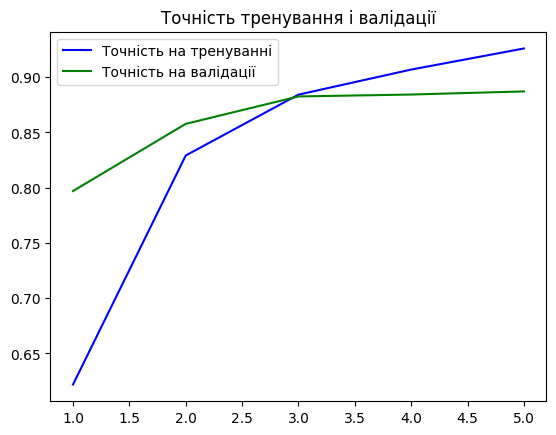

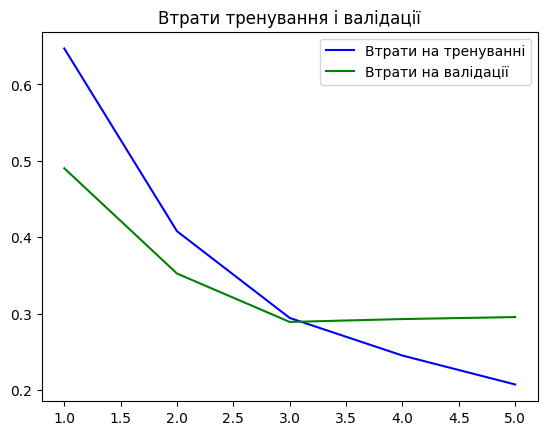

782/782 [==============================] - 25s 31ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 29s 37ms/step - loss: 0.3132 - acc: 0.8793
Test Loss: 0.3131610155105591
Test Accuracy: 0.8793200254440308


In [4]:
model2 = Sequential()


model2.add(Embedding(max_features, 32))

model2.add(LSTM(32))

model2.add(Dense(1, activation='sigmoid'))


model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


model2.summary()


history2 = model2.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)


acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'g', label='Точність на валідації') 
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Втрати на тренуванні') 
plt.plot(epochs, val_loss, 'g', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()


predictions = model2.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model2.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

Bidirectional

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
137/137 [==============================] - 109s 779ms/step - loss: 0.6411 - acc: 0.6173 - val_loss: 0.5079 - val_acc: 0.7863
Epoch 2/5
137/137 [==============================] - 114s 832ms/step - loss: 0.4211 - acc: 0.8231 - val_loss: 0

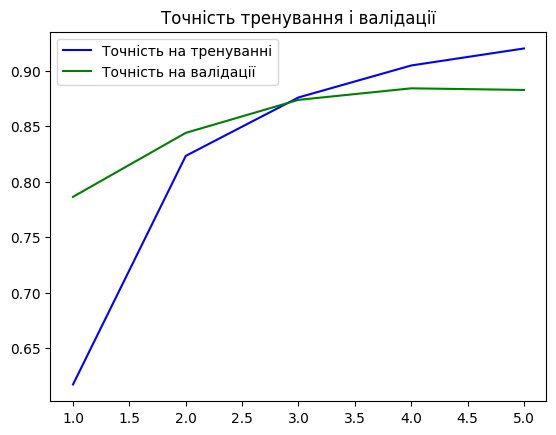

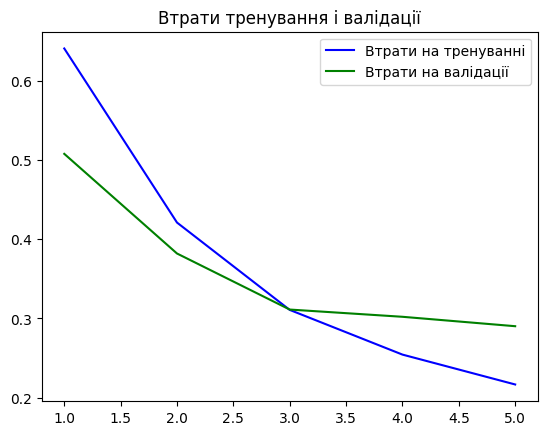

782/782 [==============================] - 36s 45ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 36s 46ms/step - loss: 0.3082 - acc: 0.8738
Test Loss: 0.30821824073791504
Test Accuracy: 0.8738399744033813


In [5]:
model3 = Sequential()


model3.add(Embedding(max_features, 32))

model3.add(Bidirectional(LSTM(32)))

model3.add(Dense(1, activation='sigmoid'))


model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


model3.summary()


history3 = model3.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)


acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'g', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'g', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()


predictions = model3.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model3.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

Deep RNN

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 64)         16640     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361,537
Trainable params: 361,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
137/137 [=============================

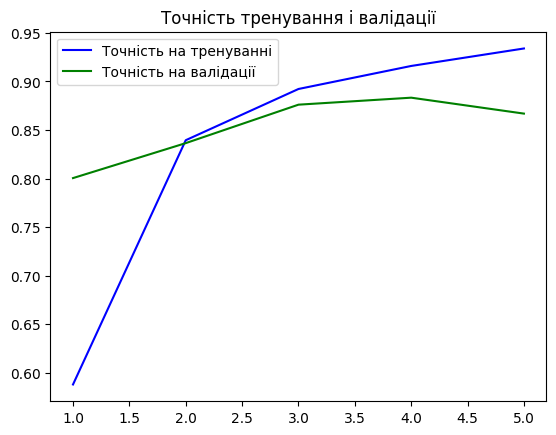

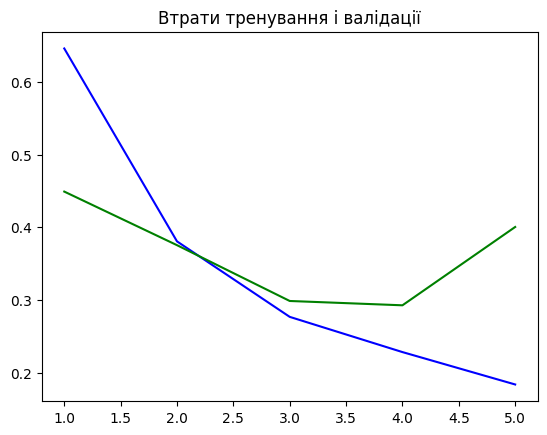

782/782 [==============================] - 78s 98ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 87s 112ms/step - loss: 0.4155 - acc: 0.8589
Test Loss: 0.4154505729675293
Test Accuracy: 0.8589199781417847


In [6]:
model4 = Sequential()


model4.add(Embedding(max_features, 32))

model4.add(Bidirectional(LSTM(32, return_sequences=True)))

model4.add(Bidirectional(LSTM(32)))

model4.add(Dense(1, activation='sigmoid'))


model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


model4.summary()


history4 = model4.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)


acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'g', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'g', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')

plt.show()


predictions = model4.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model4.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))